## Import Necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [2]:
fraud_check = pd.read_csv('Fraud_check.csv')
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data Understanding

In [3]:
fraud_check.shape

(600, 6)

In [4]:
fraud_check.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### Inference 
* Number of features and records in the given data set is 6 and 600 respesctively

* There is no null values in the data set

* The categorical data can be converted into numeric data type by using encoder so that the model can learn the things more easily

## Data Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
fraud_check['Undergrad'] = le.fit_transform(fraud_check['Undergrad'])
fraud_check['Marital.Status'] = le.fit_transform(fraud_check['Marital.Status'])
fraud_check['Urban'] = le.fit_transform(fraud_check['Urban'])

In [8]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
fraud_check.insert(6,'tax_category','')
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,
1,1,0,33700,134075,18,1,
2,0,1,36925,160205,30,1,
3,1,2,50190,193264,15,1,
4,0,1,81002,27533,28,0,
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,
596,1,0,69967,55369,2,1,
597,0,0,47334,154058,0,1,
598,1,1,98592,180083,17,0,


In [10]:
for i in range(0,len(fraud_check['Taxable.Income'])):
    if fraud_check['Taxable.Income'][i]<=30000:
        fraud_check['tax_category'][i] = 'Risky'
    else:
        fraud_check['tax_category'][i] = 'Good'

In [11]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


## Model Building

In [12]:
x = fraud_check.drop(labels=['Taxable.Income','tax_category'],axis=1)
y = fraud_check[['tax_category']]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

## Model Training | Testing | Evaluation

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
y_pred = rf_model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy score is',accuracy_score(y_test,y_pred))
print('confusion matrix is \n',confusion_matrix(y_test,y_pred))
print('classification report is \n',classification_report(y_test,y_pred))

Accuracy score is 0.75
confusion matrix is 
 [[89  6]
 [24  1]]
classification report is 
               precision    recall  f1-score   support

        Good       0.79      0.94      0.86        95
       Risky       0.14      0.04      0.06        25

    accuracy                           0.75       120
   macro avg       0.47      0.49      0.46       120
weighted avg       0.65      0.75      0.69       120



In [27]:
confusion_matrix_data=confusion_matrix(y_test,y_pred)
confusion_matrix_data

array([[95,  0],
       [25,  0]], dtype=int64)

<AxesSubplot:>

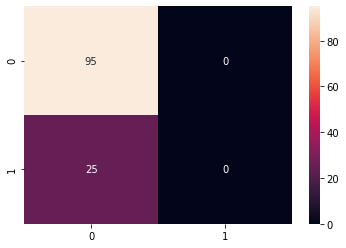

In [28]:
sns.heatmap(confusion_matrix_data,annot=True)

### GridSearchCV to tweak the hyperparameters

In [17]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=rf_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.79375


In [18]:
rf_model_cv=RandomForestClassifier(criterion='entropy',max_depth=2,min_samples_leaf=1)
rf_model_cv.fit(x_train,y_train)
y_pred=rf_model_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7916666666666666


### Check for imbalance dataset

In [19]:
fraud_check['tax_category'].value_counts()

Good     476
Risky    124
Name: tax_category, dtype: int64

### Inference

* There is an imbalance in dataset,to overcome oversampling is done using SMOTE technique

In [20]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_smt,y_smt = smt.fit_resample(x,y)

In [21]:
x_smt.shape,y_smt.shape

((952, 5), (952, 1))

In [22]:
x_train_smt,x_test_smt,y_train_smt,y_test_smt = train_test_split(x_smt,y_smt,test_size=0.20,random_state=12)

In [23]:
rf_model_smt = RandomForestClassifier()
rf_model_smt.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_pred_smt = rf_model_smt.predict(x_test_smt)

In [25]:
print('Accuracy score is',accuracy_score(y_test_smt,y_pred_smt))
print('confusion matrix is \n',confusion_matrix(y_test_smt,y_pred_smt))
print('classification report is \n',classification_report(y_test_smt,y_pred_smt))

Accuracy score is 0.6963350785340314
confusion matrix is 
 [[89  3]
 [55 44]]
classification report is 
               precision    recall  f1-score   support

        Good       0.62      0.97      0.75        92
       Risky       0.94      0.44      0.60        99

    accuracy                           0.70       191
   macro avg       0.78      0.71      0.68       191
weighted avg       0.78      0.70      0.68       191

